In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
#data = pd.read_csv('C:\\Windows\\System32\\opencv\\Scripts\\datasets\\application_record_final.csv', sep=',')


from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab/datasets/application_record_final.csv', sep=',')

%matplotlib inline

X = data.drop(['STATUS_C'], axis='columns')
y = data['STATUS_C']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data

,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_C
0,-7,1,0,0,1,135000.0,34134,36892,39481,48803,-12546,-2539,402,3.0,1
1,-42,1,1,1,0,247500.0,5445,15784,6795,48803,-10012,-826,3301,1.0,1
2,-1,0,0,1,0,180000.0,34134,36892,6795,48803,-18913,-807,13688,1.0,1
3,-17,0,1,1,0,117000.0,34134,36892,39481,48803,-11736,-1816,1343,2.0,1
4,-22,1,1,1,0,180000.0,5445,15784,39481,48803,-10091,-643,3301,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55299,-14,0,0,1,0,360000.0,34134,36892,39481,48803,-14687,-2463,1343,2.0,0
55300,-60,0,1,0,0,144000.0,34134,36892,1242,48803,-14407,-1345,166,1.0,0
55301,-8,1,1,0,0,225000.0,34134,15784,4552,840,-14555,-1226,6989,2.0,0
55302,-58,1,0,1,0,225000.0,34134,36892,6795,48803,-16496,-338,2713,1.0,0


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

def classsifier_quality(a): 
   
    print('Accuracy:', accuracy_score(y_test, a))
    print('Precision:', precision_score(y_test, a))
    print('Recall:', recall_score(y_test, a))
    print('ROC AUC:', roc_auc_score(y_test, a))
    pr, rec, _ = precision_recall_curve(y_test, a)
    print('PRC AUC:', auc(rec, pr))
    print('F1:', f1_score(y_test, a))
    print('F0.5:', fbeta_score(y_test, a, 0.5))
    print('F2:', fbeta_score(y_test, a, 2))

### Logistic regresseion:

In [4]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_labels = lr_clf.predict(X_test)
lr_predict = lr_clf.predict_proba(X_test)

classsifier_quality(lr_labels)

Accuracy: 0.575584899457564
Precision: 0.49382716049382713
Recall: 0.036180385062669594
ROC AUC: 0.5044391270823241
PRC AUC: 0.469348740177295
F1: 0.06742114134360702
F0.5: 0.13990206855201356
F2: 0.04441201662278336


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


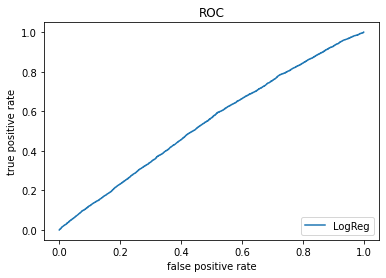

LogReg:0.542359 


In [5]:
import sklearn.metrics as metrics
aucs = ""
for  predicted, descr in zip([lr_predict[:,1]],
                                    ["LogReg"]):
    fpr, tpr, thr = metrics.roc_curve(y_test, predicted)
    plt.plot(fpr, tpr,label=descr)
    aucs += descr + ":%3f"%roc_auc_score(y_test, predicted) + " "
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.show()

print(aucs)

In [6]:
lr_clf.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [7]:
param_grid =  {
    #'C' :np.logspace(-3,3,10),
    #'penalty' : ['l1','l2','none'],
    #'solver' : ['liblinear','saga'],
    'C': [0.0001,0.001,0.01,0.1,1, 10, 100, 1000, 10000],
    #'max_iter' : [100, 500]
    }

In [8]:
%%time
grid_l1 = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid, cv=None)
grid_l1.fit(X_train, y_train)

CPU times: user 13.4 s, sys: 4.26 s, total: 17.7 s
Wall time: 12.7 s


In [9]:
grid_l1.best_params_

{'C': 100}

In [10]:
%%time
grid_l2 = GridSearchCV(LogisticRegression(penalty='l2',max_iter=1000), param_grid,  cv=None)
grid_l2.fit(X_train, y_train)

CPU times: user 41.4 s, sys: 22.1 s, total: 1min 3s
Wall time: 32.2 s


In [11]:
grid_l2.best_params_

{'C': 0.0001}

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train,), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [13]:
%%time
grid_sl1 = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid, cv=None)
grid_sl1.fit(X_train_scaled, y_train)

CPU times: user 21.7 s, sys: 3.8 s, total: 25.5 s
Wall time: 21 s


In [14]:
grid_sl1.best_params_

{'C': 10}

In [15]:
%%time
grid_sl2 = GridSearchCV(LogisticRegression(penalty='l2',max_iter=1000), param_grid,  cv=None)
grid_sl2.fit(X_train_scaled, y_train)

CPU times: user 22.1 s, sys: 11.9 s, total: 33.9 s
Wall time: 17.3 s


In [16]:
grid_sl2.best_params_

{'C': 10}

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

#lr_clf_l1 = LogisticRegressionCV(Cs=1,penalty='l1', solver='liblinear',cv=5,max_iter=1000)
lr_clf_l1 = LogisticRegression(C=0.001,penalty='l1', solver='liblinear',max_iter=1000)
lr_clf_l1.fit(X_train,y_train)
lr_labels_l1 = lr_clf_l1.predict(X_test)
lr_predict_l1 = lr_clf_l1.predict_proba(X_test)

#lr_clf_l2 = LogisticRegressionCV(Cs=10,penalty='l2', solver='lbfgs',cv=5,max_iter=1000)
lr_clf_l2 = LogisticRegression(C=0.0001,penalty='l2', solver='lbfgs',max_iter=1000)
lr_clf_l2.fit(X_train,y_train)
lr_labels_l2 = lr_clf_l2.predict(X_test)
lr_predict_l2 = lr_clf_l2.predict_proba(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_labels = knn_clf.predict(X_test)
knn_predict = knn_clf.predict_proba(X_test)

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train,y_train)
tree_labels = tree_clf.predict(X_test)
tree_predict = tree_clf.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_labels = rfc.predict(X_test)
rfc_predict = rfc.predict_proba(X_test)

print("KNN METRICS:")
classsifier_quality(knn_labels)

print(" ")
print("TREE METRICS:")
classsifier_quality(tree_labels)

print(" ")
print("RFC METRICS:")
classsifier_quality(rfc_labels)

print(" ")
print("LR_L1 METRICS:")
classsifier_quality(lr_labels_l1)

print(" ")
print("LR_L2 METRICS:")
classsifier_quality(lr_labels_l2)

KNN METRICS:
Accuracy: 0.6915785436414443
Precision: 0.7060546875
Recall: 0.4671146142912521
ROC AUC: 0.6619724517422775
PRC AUC: 0.699564761574493
F1: 0.5622521191383467
F0.5: 0.6405258868138488
F2: 0.5010256125956314
 
TREE METRICS:
Accuracy: 0.6585940496411156
Precision: 0.5988463555322496
Recall: 0.5902571391652668
ROC AUC: 0.649580624377154
PRC AUC: 0.6814236995705543
F1: 0.594520726231535
F0.5: 0.5971085723249067
F2: 0.5919552145967241
 
RFC METRICS:
Accuracy: 0.7126732781765382
Precision: 0.6722828338627261
Recall: 0.6290218374466986
ROC AUC: 0.7016399141571392
PRC AUC: 0.7293055601355627
F1: 0.6499332443257677
F0.5: 0.66316104950549
F2: 0.6372228185459592
 
LR_L1 METRICS:
Accuracy: 0.5859404964111555
Precision: 0.5212121212121212
Recall: 0.28892621785760436
ROC AUC: 0.5467652398268236
PRC AUC: 0.5558280320629434
F1: 0.37176822678526894
F0.5: 0.4490140166271739
F2: 0.3171991147931681
 
LR_L2 METRICS:
Accuracy: 0.5862692455207934
Precision: 0.5214220601640839
Recall: 0.2956454322

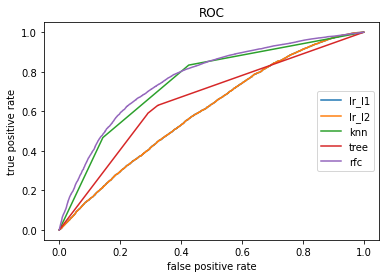

lr_l1:0.601129 lr_l2:0.601129 knn:0.743926 tree:0.656986 rfc:0.763969 


In [18]:
import sklearn.metrics as metrics
aucs = ""
for  predicted, descr in zip([lr_predict_l1[:,1], lr_predict_l2[:,1],knn_predict[:,1],tree_predict[:,1],rfc_predict[:,1]],
                                    ["lr_l1","lr_l2","knn", "tree","rfc"]):
    fpr, tpr, thr = metrics.roc_curve(y_test, predicted)
    plt.plot(fpr, tpr,label=descr)
    aucs += descr + ":%3f"%roc_auc_score(y_test, predicted) + " "
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=5)
plt.show()

print(aucs)

In [19]:

sknn_clf = KNeighborsClassifier(n_neighbors=3)
sknn_clf.fit(X_train_scaled,y_train)
sknn_labels = sknn_clf.predict(X_test_scaled)
sknn_predict = sknn_clf.predict_proba(X_test_scaled)

stree_clf = DecisionTreeClassifier(random_state=0)
stree_clf.fit(X_train_scaled,y_train)
stree_labels = stree_clf.predict(X_test_scaled)
stree_predict = stree_clf.predict_proba(X_test_scaled)

srfc = RandomForestClassifier()
srfc.fit(X_train_scaled,y_train)
srfc_labels = srfc.predict(X_test_scaled)
srfc_predict = srfc.predict_proba(X_test_scaled)

slr_clf_l1 = LogisticRegression(C=1,penalty='l1', solver='liblinear',max_iter=1000)
slr_clf_l1.fit(X_train_scaled,y_train)
slr_labels_l1 = slr_clf_l1.predict(X_test_scaled)
slr_predict_l1 = slr_clf_l1.predict_proba(X_test_scaled)

slr_clf_l2 = LogisticRegression(C=0.1,penalty='l2', solver='lbfgs',max_iter=1000)
slr_clf_l2.fit(X_train_scaled,y_train)
slr_labels_l2 = slr_clf_l1.predict(X_test_scaled)
slr_predict_l2 = slr_clf_l1.predict_proba(X_test_scaled)

print("KNN METRICS:")
classsifier_quality(sknn_labels)

print(" ")
print("RFC METRICS:")
classsifier_quality(stree_labels)

print(" ")
print("TREE METRICS:")
classsifier_quality(stree_labels)

print(" ")
print("LR_L1 METRICS:")
classsifier_quality(slr_labels_l1)

print(" ")
print("LR_L2 METRICS:")
classsifier_quality(slr_labels_l2)

KNN METRICS:
Accuracy: 0.6830858583091337
Precision: 0.6253044481476734
Recall: 0.6303139940560796
ROC AUC: 0.676125414075224
PRC AUC: 0.706188487991362
F1: 0.6277992277992278
F0.5: 0.6262999768892997
F2: 0.6293056738137626
 
RFC METRICS:
Accuracy: 0.659525505451756
Precision: 0.5999737773698702
Recall: 0.5912908644527717
ROC AUC: 0.6505255692126872
PRC AUC: 0.6822851070600251
F1: 0.5956006768189509
F0.5: 0.5982168536094334
F2: 0.593007283000285
 
TREE METRICS:
Accuracy: 0.659525505451756
Precision: 0.5999737773698702
Recall: 0.5912908644527717
ROC AUC: 0.6505255692126872
PRC AUC: 0.6822851070600251
F1: 0.5956006768189509
F0.5: 0.5982168536094334
F2: 0.593007283000285
 
LR_L1 METRICS:
Accuracy: 0.5835844611254177
Precision: 0.514853601196837
Recall: 0.31128052719989663
ROC AUC: 0.5476684218952299
PRC AUC: 0.5590864603958354
F1: 0.3879851827991625
F0.5: 0.45530145530145527
F2: 0.3380103830503718
 
LR_L2 METRICS:
Accuracy: 0.5835844611254177
Precision: 0.514853601196837
Recall: 0.3112805

In [37]:

from sklearn.feature_selection import RFE

rfe = RFE(lr_clf_l1, 5)
fit = rfe.fit(X_test, y_test)
fit.n_features_
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

#lr_clf_l1.coef_.tolist()

print(dict(zip(X.columns, lr_clf_l1.coef_.tolist())))

5
[ True False False False False False  True False False False  True  True
  True False]
[ 1 10  9  8  7  4  1  3  2  5  1  1  1  6]
{'MONTHS_BALANCE': [0.026104856017836138, 0.0, 0.0, 0.0, 0.0, -5.953850452461866e-07, 1.1535658673208339e-06, 2.3005153664664656e-07, -1.1605982372872022e-07, 2.8515130456444036e-07, -1.1695814496523152e-05, -7.347077273456877e-06, 7.759467110911498e-06, 0.0]}


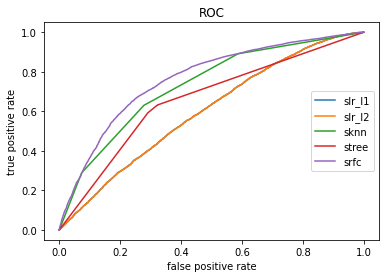

slr_l1:0.598909 slr_l2:0.598909 sknn:0.730103 stree:0.658258 srfc:0.763532 


In [33]:
import sklearn.metrics as metrics
aucs = ""
for  predicted, descr in zip([slr_predict_l1[:,1], slr_predict_l2[:,1],sknn_predict[:,1],stree_predict[:,1],srfc_predict[:,1]],
                                    ["slr_l1","slr_l2","sknn", "stree","srfc"]):
    fpr, tpr, thr = metrics.roc_curve(y_test, predicted)
    plt.plot(fpr, tpr,label=descr)
    aucs += descr + ":%3f"%roc_auc_score(y_test, predicted) + " "
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=5)
plt.show()

print(aucs)

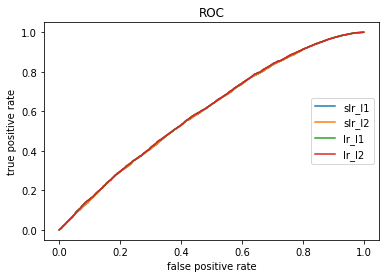

slr_l1:0.598909 slr_l2:0.598909 lr_l1:0.601129 lr_l2:0.601129 


In [22]:
import sklearn.metrics as metrics
aucs = ""
for  predicted, descr in zip([slr_predict_l1[:,1], slr_predict_l2[:,1],lr_predict_l1[:,1],lr_predict_l2[:,1]],
                                    ["slr_l1","slr_l2","lr_l1", "lr_l2"]):
    fpr, tpr, thr = metrics.roc_curve(y_test, predicted)
    plt.plot(fpr, tpr,label=descr)
    aucs += descr + ":%3f"%roc_auc_score(y_test, predicted) + " "
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=5)
plt.show()

print(aucs)